<a href="https://colab.research.google.com/github/abhi-11nav/Covid-19-image-classification/blob/main/Corona_virus_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset Credits :

https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset?

In [1]:
# Storing the path of the data on google drive

train_path = "/content/drive/MyDrive/Covid19-dataset/train"
test_path = "/content/drive/MyDrive/Covid19-dataset/test"

In [2]:
# Importing the libraries required in builidng the model 

import pandas as pd
import numpy as np 

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Input, Flatten, Lambda, Conv2D, MaxPool2D
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from glob import glob
 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [3]:
# Specifying the size of the image 

image_size = [224,224]

In [4]:
# Storing the number of images to classify  

output_len = len(glob(train_path+"/*"))

print("There are ",output_len," images to classify. ")

There are  3  images to classify. 


In [5]:
# Data Augmentation 

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.3,
                                  zoom_range=0.3,
                                  horizontal_flip=True,
                                  vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
training_set = train_datagen.flow_from_directory(train_path,
                                                    target_size=(224,224),
                                                    batch_size=16,
                                                    class_mode="categorical")

Found 251 images belonging to 3 classes.


In [7]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=16,
                                            class_mode="categorical")

Found 66 images belonging to 3 classes.


In [8]:
# Building the model 

vgg16 = VGG16(include_top=False,input_shape=image_size+[3],)

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
for layers in vgg16.layers:
  layers.trainable = False

In [10]:
x = Flatten()(vgg16.output)

In [11]:
prediction = Dense(output_len, activation="softmax")(x)

model = Model(inputs= vgg16.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
history = model.fit(training_set,validation_data=test_set, epochs=10)

Epoch 1/10
16/16 [==============================] - 170s 10s/step - loss: 1.2159 - accuracy: 0.5179 - val_loss: 0.6548 - val_accuracy: 0.6970
Epoch 2/10
16/16 [==============================] - 14s 864ms/step - loss: 0.5055 - accuracy: 0.7968 - val_loss: 0.5661 - val_accuracy: 0.7576
Epoch 3/10
16/16 [==============================] - 14s 867ms/step - loss: 0.3103 - accuracy: 0.8845 - val_loss: 0.2235 - val_accuracy: 0.8939
Epoch 4/10
16/16 [==============================] - 14s 853ms/step - loss: 0.2349 - accuracy: 0.9004 - val_loss: 0.2860 - val_accuracy: 0.8788
Epoch 5/10
16/16 [==============================] - 14s 866ms/step - loss: 0.1765 - accuracy: 0.9283 - val_loss: 0.1826 - val_accuracy: 0.9091
Epoch 6/10
16/16 [==============================] - 14s 867ms/step - loss: 0.1951 - accuracy: 0.9243 - val_loss: 0.2723 - val_accuracy: 0.8636
Epoch 7/10
16/16 [==============================] - 14s 883ms/step - loss: 0.1857 - accuracy: 0.9243 - val_loss: 0.2721 - val_accuracy: 0.8485


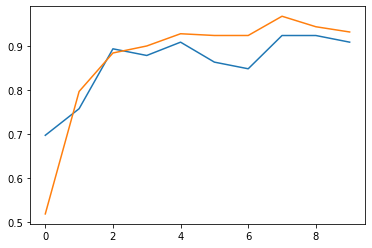

In [19]:
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])

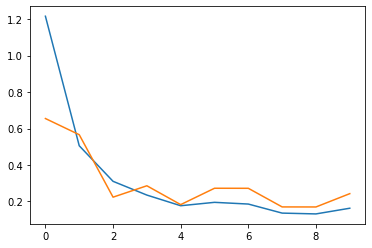

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])